# INTERCONECT. Retención de clientes

## OBJETIVO 

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

## PREGUNTAS

1.	Se revisaron los datos previos a este plan de trabajo ¿los datos personales de los clientes, en verdad brindan información valiosa para predecir la posible cancelación de contrato? Es que considero son datos que no son relevantes para las cancelaciones, por ejemplo, nos podría servir más si han tenido incidencias técnicas con sus servicios, cuantas llamadas de servicio ha hecho el cliente al mes o en total, en que meses hay más llamadas de incidencias, si hay quejas del servicio o no, por ejemplo.
2.	La columna target tiene dos tipos de datos fechas y un str ‘No’, ¿es correcto el crear una columna target más entendible donde nos indique si el contrato fue cancelado o no, representado con 0 y 1 y sea categórico?
3.	¿Es correcto el unificar todos los archivos en uno mismo para provechar la mayor cantidad de información posible en el entrenamiento del modelo?
4.	¿en este caso es buena idea revisar si hay datos outliers o es bueno hacerlo solo como parte de buenas prácticas?
5.	Ya me adelanté un poco en el código, ¿hay algún otro modelo para trabajar con dato categóricos a parte de CatBoost?
6.	¿hay alguna recomendación que me puedas hacer para mejorar mi trabajo y mi código? 

## PLAN DE TRABAJO

Observando los datos, se propone el siguiente plan de trabajo:

•	Cargar los datos:

En esta parte se busca el cargar las librerías necesarias para el proyecto y se cargan los archivos que contienen la información con la que vamos a trabajar. Realizar una revisión rápida de los datos de cada uno de los archivos y familiarizarse con las columnas.

•	Realizar un EDA:

Se pudo apreciar que se en su mayoría se trata de datos categóricos, se realiza un análisis de cada uno de los archivos, se buscan datos ausentes, duplicados, se aprecia que los datos de las columnas tienen letras mayúsculas y hay que cambiarlo a un mejor formato, se revisar que los tipos de datos sean correctos.

En esta ocasión la columna target son las fechas de cancelación de contrato en donde está representada con una fecha de cancelación o con una respuesta “No”, por lo que se busca representar el sentido de la columna target en datos categóricos binarios de esta activo el contrato o fue cancelado.

Posteriormente intentar juntar los 4 DataFrame en uno solo para aprovechar la mayor cantidad de información que nos brinda los datos, se pudo observar que los tamaños en número de filas en los archivos son diferentes, por lo que al unirlo se generaran datos ausentes, como se mencionó al ser datos categóricos, podemos rellenar estos ausentes con una nueva categoría. 

•	Entrenamiento y prueba de modelos:

Una vez realizado el análisis EDA, procedemos a probar diferentes modelos para obtener predicciones, se recomienda utilizar bosque aleatorio y regresión lógica, ya que se trata en su mayoría de datos categóricos y buscamos que nuestra columna target sea categórica, por lo que se recomiendan estos dos modelos que suelen ser los más precisos. Para calificar el modelo se basarán en las métricas de precisión y AUC_ROC, buscando que sea superior a 0.85

•	Conclusiones


# Contents <a id='back'></a>

* [1 Objetivo y descripción del problema](#obj_desc_prob)
* [2 Preparación de datos](#prep_dat)
    * [2.1 Carga de datos](#carga)
* [3 EDA y Preprosesamiento de datos](#eda)
    * [3.0.1 EDA para Contratos](#eda_cont)
    * [3.0.2 EDA para Internet](#eda_internet)
    * [3.0.3 EDA para personal](#eda_personal)
    * [3.0.4 EDA para teléfono](#eda_phone)
    * [3.1 EDA general](#eda_gen)
* [4. Preparación y entrenamiento de modelos](#mod)
* [5. Sobremuestre](#oversampling)
* [6. Submuestreo](#subsampling)
* [7. Resultados](#results)

* [8. Conclusions](#end)

## Objetivo y descripción del problema <a id='obj_desc_prob'></a>

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

[Back to Contents](#back)

## Preparación de datos <a id='prep_dat'></a>

### Carga de datos <a id='carga'></a>

In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import catboost as cb
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense


In [3]:
try:
    df_contract = pd.read_csv('contract.csv')

except:
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv')

df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
try:
    df_internet = pd.read_csv('internet.csv')

except:
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv')

df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [5]:
try:
    df_personal = pd.read_csv('personal.csv')

except:
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv')

df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
try:
    df_phone = pd.read_csv('phone.csv')

except:
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


[Back to Contents](#back)

## EDA y preprosesamiento de datos <a id='eda'></a>

#### EDA para contratos <a id='eda_cont'></a>

In [7]:
df_contract.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [8]:
df_contract = df_contract.rename(columns={'customerID': 'customer_id', 'BeginDate':'begin_date', 'EndDate':'end_date', 'Type':'type', 'PaperlessBilling': 'paperless_billing','PaymentMethod':'payment_method', 'MonthlyCharges':'monthly_charges', 'TotalCharges':'total_charges'})

In [9]:
# Se crea una nueva columna donde categóricamente la cuenta ha sido finalizada o no

df_contract["target"] = (df_contract["end_date"] == "No").astype("float")


In [10]:
df_contract['begin_date'] = pd.to_datetime(df_contract['begin_date'],format= '%Y-%m-%d')

In [11]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   target             7043 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 495.3+ KB


In [12]:
# Se crean características basandonos en las fechas de termino de contrato

def make_features(data):

    df_contract['year'] = pd.DatetimeIndex(data).year
    df_contract['month'] = pd.DatetimeIndex(data).month
    df_contract['day'] = pd.DatetimeIndex(data).day
    df_contract['dayofweek'] = pd.DatetimeIndex(data).dayofweek



In [13]:
make_features(df_contract['begin_date'])
df_contract = df_contract.rename(columns={'year': 'begin_year', 'month':'begin_month', 'day':'begin_day', 'dayofweek':'begin_dayofweek'})

In [14]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   target             7043 non-null   float64       
 9   begin_year         7043 non-null   int64         
 10  begin_month        7043 non-null   int64         
 11  begin_day          7043 non-null   int64         
 12  begin_dayofweek    7043 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory us

In [15]:
df_contract.isnull().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
target               0
begin_year           0
begin_month          0
begin_day            0
begin_dayofweek      0
dtype: int64

In [16]:
df_contract.duplicated().sum()

0

In [17]:
df_contract.describe()

,monthly_charges,target,begin_year,begin_month,begin_day,begin_dayofweek
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.000000
mean,64.761692,0.734630,2016.878603,6.421269,1.0,3.209428
std,30.090047,0.441561,1.970573,3.578453,0.0,1.997872
min,18.250000,0.000000,2013.000000,1.000000,1.0,0.000000
25%,35.500000,0.000000,2015.000000,3.000000,1.0,1.000000
50%,70.350000,1.000000,2017.000000,6.000000,1.0,3.000000
75%,89.850000,1.000000,2019.000000,10.000000,1.0,5.000000
max,118.750000,1.000000,2020.000000,12.000000,1.0,6.000000


#### EDA para internet <a id='eda_internet'></a>


In [18]:
df_internet.columns

Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [19]:
df_internet = df_internet.rename(columns={'customerID': 'customer_id', 'InternetService':'internet_service', 'OnlineSecurity':'online_security', 'OnlineBackup':'online_backup', 'DeviceProtection':'device_protection', 'TechSupport':'tech_support', 'StreamingTV':'streaming_tv', 'StreamingMovies':'streamin_movies'})

In [20]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streamin_movies    5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [21]:
df_internet.isnull().sum()

customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streamin_movies      0
dtype: int64

In [22]:
df_internet.duplicated().sum()

0

In [23]:
df_internet.describe()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streamin_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,5160-UXJED,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


#### EDA para personal <a id='eda_personal'></a>


In [24]:
df_personal.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [25]:
df_personal = df_personal.rename(columns={'customerID': 'customer_id', 'SeniorCitizen':'senior_citizen', 'Partner':'partner', 'Dependents':'dependents'})

In [26]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [27]:
df_personal.isnull().sum()

customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

In [28]:
df_personal.duplicated().sum()

0

In [29]:
df_personal.describe()

,senior_citizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


#### EDA para phone <a id='eda_phone'></a>


In [30]:
df_phone.columns

Index(['customerID', 'MultipleLines'], dtype='object')

In [31]:
df_phone = df_phone.rename(columns={'customerID': 'customer_id', 'MultipleLines':'multiple_lines'})

In [32]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [33]:
df_phone.isnull().sum()

customer_id       0
multiple_lines    0
dtype: int64

In [34]:
df_phone.duplicated().sum()

0

In [35]:
df_phone.describe()

,customer_id,multiple_lines
count,6361,6361
unique,6361,2
top,3170-GWYKC,No
freq,1,3390


En general podemos obserbar que los datos no presentan datos ausenteso duplicados.

[Back to Contents](#back)

### EDA de datos generales <a id='eda_gen'></a>

In [36]:
# Se unifican los datos en un solo df, con la columna compartida 'customer_id'

df_general = df_contract.merge(df_personal, on = 'customer_id', how = 'left')
df_general = df_general.merge(df_internet, on = 'customer_id', how = 'left')

df_general.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target,begin_year,...,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streamin_movies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,1.0,2020,...,0,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,1.0,2017,...,0,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,0.0,2019,...,0,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,1.0,2016,...,0,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,0.0,2019,...,0,No,No,Fiber optic,No,No,No,No,No,No


In [37]:
# Se revisa el df_general

df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   target             7043 non-null   float64       
 9   begin_year         7043 non-null   int64         
 10  begin_month        7043 non-null   int64         
 11  begin_day          7043 non-null   int64         
 12  begin_dayofweek    7043 non-null   int64         
 13  gender             7043 non-null   object        
 14  senior_c

In [38]:
# Se revisan los datos ausentes

df_general.isnull().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
target                  0
begin_year              0
begin_month             0
begin_day               0
begin_dayofweek         0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streamin_movies      1526
dtype: int64

In [39]:
# Debido a la presencia de datos ausentes en características categóricas, se crea una nueva categoría

df_general= df_general.fillna('Unknown')
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   target             7043 non-null   float64       
 9   begin_year         7043 non-null   int64         
 10  begin_month        7043 non-null   int64         
 11  begin_day          7043 non-null   int64         
 12  begin_dayofweek    7043 non-null   int64         
 13  gender             7043 non-null   object        
 14  senior_c

In [40]:
df_general.isnull().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
target               0
begin_year           0
begin_month          0
begin_day            0
begin_dayofweek      0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streamin_movies      0
dtype: int64

In [41]:
df_general.duplicated().sum()

0

In [42]:
df_general.describe()

,monthly_charges,target,begin_year,begin_month,begin_day,begin_dayofweek,senior_citizen
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000
mean,64.761692,0.734630,2016.878603,6.421269,1.0,3.209428,0.162147
std,30.090047,0.441561,1.970573,3.578453,0.0,1.997872,0.368612
min,18.250000,0.000000,2013.000000,1.000000,1.0,0.000000,0.000000
25%,35.500000,0.000000,2015.000000,3.000000,1.0,1.000000,0.000000
50%,70.350000,1.000000,2017.000000,6.000000,1.0,3.000000,0.000000
75%,89.850000,1.000000,2019.000000,10.000000,1.0,5.000000,0.000000
max,118.750000,1.000000,2020.000000,12.000000,1.0,6.000000,1.000000


<AxesSubplot:>

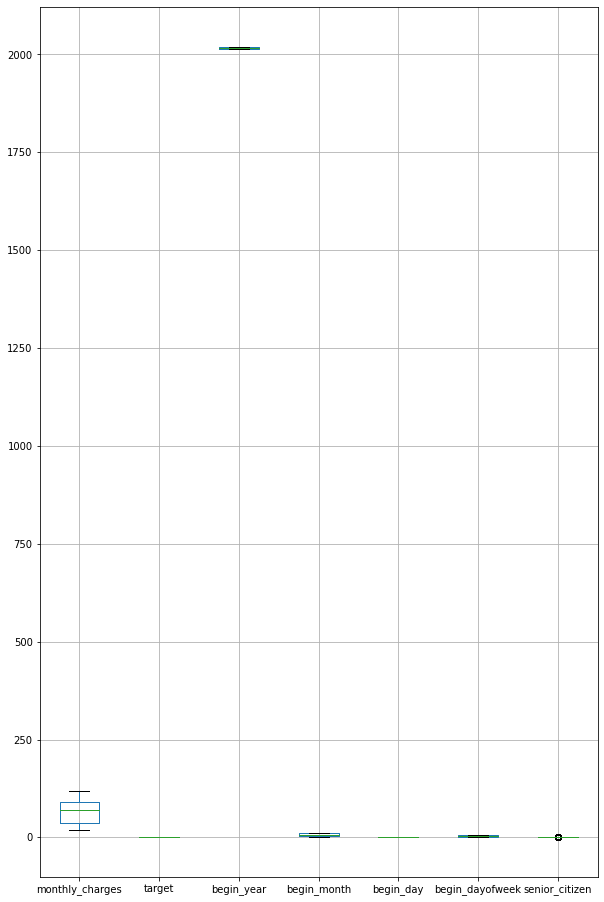

In [43]:
df_general.boxplot(figsize=(10,16))

In [44]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   target             7043 non-null   float64       
 9   begin_year         7043 non-null   int64         
 10  begin_month        7043 non-null   int64         
 11  begin_day          7043 non-null   int64         
 12  begin_dayofweek    7043 non-null   int64         
 13  gender             7043 non-null   object        
 14  senior_c

<Figure size 720x432 with 0 Axes>

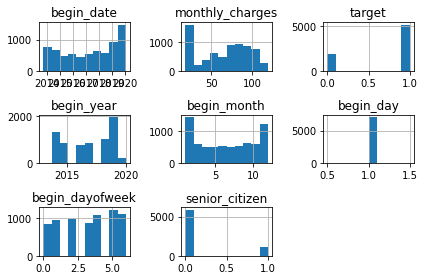

In [45]:
plt.figure(figsize=(10, 6))
df_general.hist()
plt.tight_layout()
plt.show()

Podemos observar que los datos no presentan outliers y se puede proceder a codificar los datos para poder tener más información para el modeloq ue queremos entrenar.

En los histogramas podemos observar que todos los contratos comenzaron el primer día del mes, siendo los meses de enero y diciembre donde se firman nuevos contratos.

La mayoría de los usuarios no son personas jubiladas.



In [46]:
df_general[['end_date', 'target']]

,end_date,target
0,No,1.0
1,No,1.0
2,2019-12-01 00:00:00,0.0
3,No,1.0
4,2019-11-01 00:00:00,0.0
...,...,...
7038,No,1.0
7039,No,1.0
7040,No,1.0
7041,2019-11-01 00:00:00,0.0


In [47]:
# Se realiza una codificación de datos categóricos

df = pd.get_dummies(df_general.drop(columns = ['customer_id', 'end_date'], axis=1), drop_first=True)

df.head()

,begin_date,monthly_charges,target,begin_year,begin_month,begin_day,begin_dayofweek,senior_citizen,type_One year,type_Two year,...,online_backup_Unknown,online_backup_Yes,device_protection_Unknown,device_protection_Yes,tech_support_Unknown,tech_support_Yes,streaming_tv_Unknown,streaming_tv_Yes,streamin_movies_Unknown,streamin_movies_Yes
0,2020-01-01,29.85,1.0,2020,1,1,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2017-04-01,56.95,1.0,2017,4,1,5,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2019-10-01,53.85,0.0,2019,10,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2016-05-01,42.30,1.0,2016,5,1,6,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,2019-09-01,70.70,0.0,2019,9,1,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1.0    5174
0.0    1869
Name: target, dtype: int64


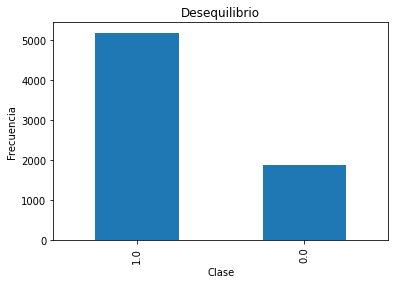

In [48]:
# Se revisa el equilibrio de nuestra característica objetivo codificado que es la columna 'active_class'

count_classes= pd.value_counts(df['target'], sort = True)
print(count_classes)

count_classes.plot(kind= 'bar')
plt.title("Desequilibrio")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()


en la grpafica anterior podemo sobserva un deseqilibrio, en donde se observa que la mayoría de los contratos no han sido cancelados y la menoría son lo que ya se cancelaron, siendo estas las características objetivo.

[Back to Contents](#back)

## PREPARACION Y ENTRENAMIENTO DE MODELO <a id='mod'></a>

In [49]:
# se segmanta los  datos

features = df.drop(['begin_date', 'target'], axis=1)
target = df['target']

In [50]:
# Se realizan los conjuntos de datos de entrenamiento y de prueba

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [51]:
# Se prueba el modelo de bosque aleatorio

def best_param_forest (target_x, features_x, target_y, features_y):
    param_grid = {
        'n_estimators': [200, 300, 400, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    
    scoring = 'accuracy'
    
    clf = RandomForestClassifier()
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=scoring, cv=3, verbose=2)
    
    grid_search.fit(features_train, target_train)
    
    print("Best hyperparameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_) 
    
    best_clf = grid_search.best_estimator_
    best_clf.fit(features_train, target_train)
    
    accuracy = best_clf.score(features_y,target_y )
    print("Testing accuracy:", accuracy)
    
    return grid_search.best_score_ , accuracy

In [52]:
%%time

# Se prueba la función para bosque aleatorio

best_score_forest, best_accuracy_forest = best_param_forest(target_train,features_train, target_test, features_test)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  17.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  17.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  17.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=  25.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=  25.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=  26.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=400; total time=  34.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=400; total time=  34.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=400; total time=  34.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=500; total time=  44.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=500; total time=  42.4s
[CV] END max_depth=None, 

In [53]:
best_score_forest

0.8024494142705006

In [54]:
best_accuracy_forest

0.8041163946061036

In [55]:
# Se prueba el modelo de regresión lógica

model_reg_logic = LogisticRegression(random_state=42, solver='liblinear')
model_reg_logic.fit(features_train, target_train)
score_train = model_reg_logic.score(features_train, target_train)

score_test_lr = model_reg_logic.score(features_test, target_test)
predict_lrv= model_reg_logic.predict(features_test)
f1_lrv= f1_score(target_test, predict_lrv)

print("Accuracy del modelo de regresión logística en el conjunto de entrenamiento:", score_train)
print("Accuracy del modelo de regresión logística en el conjunto de prueba:", score_test_lr, 'f1= ', f1_lrv)

Accuracy del modelo de regresión logística en el conjunto de entrenamiento: 0.7974795882144124
Accuracy del modelo de regresión logística en el conjunto de prueba: 0.8069552874378992 f1=  0.8726591760299625


In [56]:
# Se prueba el modelo de catboost

def model_cat(features_x, target_x, features_y, target_y):

    best_score = 0
    best_iterations = 0
    best_f1 = 0

    for iterations_cat in range (100, 801, 50):
        model_cat_1 = cb.CatBoostClassifier(
            loss_function="Logloss", iterations=iterations_cat, random_seed=42
        )

        model_cat_1.fit(features_x, target_x)
        pred_test_cat = model_cat_1.predict(features_y)

        score_test_cat = model_cat_1.score(features_y, target_y)
        f1_cat= f1_score(target_y, pred_test_cat)

        if score_test_cat > best_score:
            best_score_cat = score_test_cat
            best_iterations_cat = iterations_cat
            best_f1_cat = f1_cat

        print('Para CatBost','iterations= ', best_iterations_cat, ', Accuracy: ', best_score_cat, ', f1 =', best_f1_cat )
    
        iterations_cat= best_iterations_cat 
        score_cat= best_score_cat
        
    return iterations_cat, score_cat

In [57]:
%%time

best_iterations_cat_a, best_score_cat_a = model_cat(features_train, target_train, features_test, target_test)

Learning rate set to 0.178046
0:	learn: 0.5873989	total: 77.5ms	remaining: 7.67s
1:	learn: 0.5324643	total: 99.2ms	remaining: 4.86s
2:	learn: 0.5008549	total: 121ms	remaining: 3.92s
3:	learn: 0.4740256	total: 143ms	remaining: 3.43s
4:	learn: 0.4557364	total: 164ms	remaining: 3.12s
5:	learn: 0.4420666	total: 185ms	remaining: 2.9s
6:	learn: 0.4360772	total: 207ms	remaining: 2.74s
7:	learn: 0.4311974	total: 227ms	remaining: 2.61s
8:	learn: 0.4227458	total: 248ms	remaining: 2.51s
9:	learn: 0.4206011	total: 258ms	remaining: 2.32s
10:	learn: 0.4182785	total: 279ms	remaining: 2.25s
11:	learn: 0.4147651	total: 300ms	remaining: 2.2s
12:	learn: 0.4131763	total: 321ms	remaining: 2.15s
13:	learn: 0.4104966	total: 342ms	remaining: 2.1s
14:	learn: 0.4067501	total: 363ms	remaining: 2.06s
15:	learn: 0.4054373	total: 388ms	remaining: 2.04s
16:	learn: 0.4041499	total: 409ms	remaining: 2s
17:	learn: 0.4018890	total: 430ms	remaining: 1.96s
18:	learn: 0.4015290	total: 452ms	remaining: 1.93s
19:	learn: 0.40

In [58]:
best_iterations_cat_a

800

In [59]:
best_score_cat_a

0.8232789212207239

In [60]:
# Se entrena el modelo de red neuronal

model_rn = keras.models.Sequential()
model_rn.add(Dense(25, activation='relu', input_dim=features_train.shape[1]))
model_rn.add(Dense(10, activation='relu'))
model_rn.add(keras.layers.Dense(1, activation= 'sigmoid' ))

model_rn.compile(loss='binary_crossentropy', optimizer='sgd', metrics= ['acc',tf.keras.metrics.AUC()])

model_rn.fit(
    features_train,
    target_train,
    validation_data=(features_test, target_test),
    batch_size=2,
    epochs=20,
    steps_per_epoch=None,
    validation_steps=None,
    verbose=2,
    shuffle=True,
    )

pred_test_rn = model_rn.predict(features_test)



2023-11-10 14:48:37.282709: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
2817/2817 - 10s - loss: 1211.2272 - acc: 0.7338 - auc: 0.5020 - val_loss: 0.5780 - val_acc: 0.7353 - val_auc: 0.5000 - 10s/epoch - 4ms/step
Epoch 2/20
2817/2817 - 9s - loss: 0.5791 - acc: 0.7345 - auc: 0.4909 - val_loss: 0.5779 - val_acc: 0.7353 - val_auc: 0.5000 - 9s/epoch - 3ms/step
Epoch 3/20
2817/2817 - 9s - loss: 0.5792 - acc: 0.7345 - auc: 0.4837 - val_loss: 0.5780 - val_acc: 0.7353 - val_auc: 0.5000 - 9s/epoch - 3ms/step
Epoch 4/20
2817/2817 - 9s - loss: 0.5791 - acc: 0.7345 - auc: 0.4906 - val_loss: 0.5782 - val_acc: 0.7353 - val_auc: 0.5000 - 9s/epoch - 3ms/step
Epoch 5/20
2817/2817 - 9s - loss: 0.5788 - acc: 0.7345 - auc: 0.5068 - val_loss: 0.5785 - val_acc: 0.7353 - val_auc: 0.5000 - 9s/epoch - 3ms/step
Epoch 6/20
2817/2817 - 10s - loss: 0.5792 - acc: 0.7345 - auc: 0.4864 - val_loss: 0.5782 - val_acc: 0.7353 - val_auc: 0.5000 - 10s/epoch - 3ms/step
Epoch 7/20
2817/2817 - 9s - loss: 0.5791 - acc: 0.7345 - auc: 0.4871 - val_loss: 0.5782 - val_acc: 0.7353 - val_auc: 

En esta prueba podemos observar que los resultados del modelo CatBoost son los mejores, sin embargo, para obtenerlo se requiere de un número considerable de iteracione.

In [61]:
# Se diseña función para obtner la Curva PR 

def graphic_pr_curve(probabilities, probabilities_one, model_name):
    
   
    for threshold in np.arange(0, 1, 0.02):
        predicted_test= probabilities_one > threshold
        precision = precision_score(target_test, predicted_test)
        recall = recall_score(target_test, predicted_test)
        print(
                'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}'.format(
                    threshold, precision, recall
                )
            )

    precision, recall, thresholds = precision_recall_curve(
        target_test, probabilities[:, 1]
    )
    
    plt.figure(figsize=(6, 6))
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve '+str(model_name))
    plt.show()
    

In [62]:
# Se diseña una función para obtener la curva ROC

def graphic_roc_curve(probabilities, model_name):
    
    fpr_f, tpr_f, thresholds = roc_curve(target_test, probabilities)

    plt.figure()

    plt.plot(fpr_f, tpr_f)

    plt.plot([0, 1], [0, 1], linestyle='--')


    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')

    plt.title('Curva ROC modelo de '+str(model_name))

    plt.show()
    
    

In [63]:
%%time

# Se realiza un ajuste de umbral para modelo de Bosque

model_forest_a = RandomForestClassifier(random_state=54321, min_samples_split=5, n_estimators=400)
model_forest_a.fit(features_train, target_train)

probabilities_test_f = model_forest_a.predict_proba(features_test)
probabilities_one_test_f = probabilities_test_f[:, 1]


CPU times: user 44.8 s, sys: 144 ms, total: 45 s
Wall time: 45 s


Threshold = 0.00 | Precision = 0.735, Recall = 1.000
Threshold = 0.02 | Precision = 0.735, Recall = 1.000
Threshold = 0.04 | Precision = 0.735, Recall = 1.000
Threshold = 0.06 | Precision = 0.735, Recall = 1.000
Threshold = 0.08 | Precision = 0.735, Recall = 1.000
Threshold = 0.10 | Precision = 0.735, Recall = 1.000
Threshold = 0.12 | Precision = 0.736, Recall = 1.000
Threshold = 0.14 | Precision = 0.740, Recall = 0.999
Threshold = 0.16 | Precision = 0.742, Recall = 0.999
Threshold = 0.18 | Precision = 0.742, Recall = 0.997
Threshold = 0.20 | Precision = 0.744, Recall = 0.997
Threshold = 0.22 | Precision = 0.745, Recall = 0.995
Threshold = 0.24 | Precision = 0.749, Recall = 0.994
Threshold = 0.26 | Precision = 0.754, Recall = 0.992
Threshold = 0.28 | Precision = 0.758, Recall = 0.991
Threshold = 0.30 | Precision = 0.763, Recall = 0.988
Threshold = 0.32 | Precision = 0.769, Recall = 0.987
Threshold = 0.34 | Precision = 0.778, Recall = 0.986
Threshold = 0.36 | Precision = 0.782, Recall =

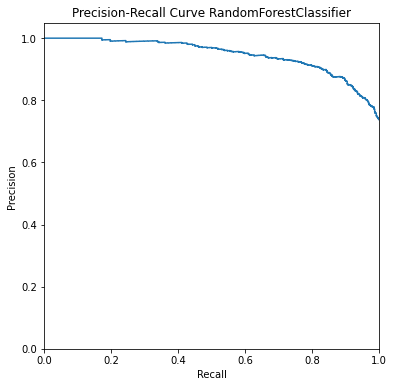

In [64]:
# Obtención de la curva PR para modelo de bosque aleatorio

graphic_pr_curve(probabilities_test_f, probabilities_one_test_f, 'RandomForestClassifier')

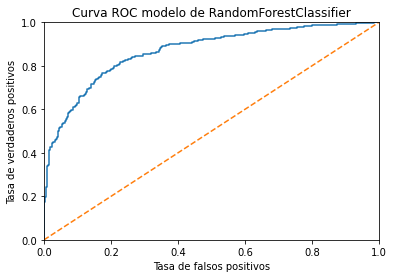

In [65]:
# Curva ROC para modelo de bosque


graphic_roc_curve(probabilities_one_test_f, 'RandomForestClassifier')

In [66]:
auc_roc_f = roc_auc_score(target_test, probabilities_one_test_f)

print(auc_roc_f)

0.8683273468796258


In [67]:
# Se realiza un ajuste de umbral para modelo de RL

probabilities_test_rl = model_reg_logic.predict_proba(features_test)
probabilities_one_test_rl = probabilities_test_rl[:, 1]


Threshold = 0.00 | Precision = 0.735, Recall = 1.000
Threshold = 0.02 | Precision = 0.735, Recall = 1.000
Threshold = 0.04 | Precision = 0.735, Recall = 1.000
Threshold = 0.06 | Precision = 0.735, Recall = 1.000
Threshold = 0.08 | Precision = 0.735, Recall = 1.000
Threshold = 0.10 | Precision = 0.735, Recall = 1.000
Threshold = 0.12 | Precision = 0.735, Recall = 1.000
Threshold = 0.14 | Precision = 0.735, Recall = 1.000
Threshold = 0.16 | Precision = 0.735, Recall = 1.000
Threshold = 0.18 | Precision = 0.736, Recall = 1.000
Threshold = 0.20 | Precision = 0.736, Recall = 0.998
Threshold = 0.22 | Precision = 0.741, Recall = 0.998
Threshold = 0.24 | Precision = 0.746, Recall = 0.996
Threshold = 0.26 | Precision = 0.747, Recall = 0.994
Threshold = 0.28 | Precision = 0.758, Recall = 0.986
Threshold = 0.30 | Precision = 0.768, Recall = 0.980
Threshold = 0.32 | Precision = 0.776, Recall = 0.973
Threshold = 0.34 | Precision = 0.780, Recall = 0.967
Threshold = 0.36 | Precision = 0.791, Recall =

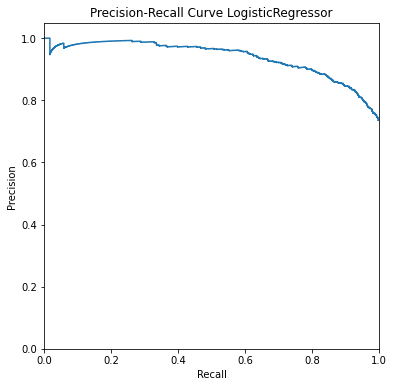

In [68]:
# Curva Pr para modelo de RL

graphic_pr_curve(probabilities_test_rl, probabilities_one_test_rl, 'LogisticRegressor')

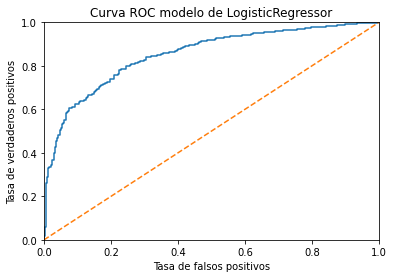

In [69]:
# Curva ROC para modelo de RL

graphic_roc_curve(probabilities_one_test_rl, 'LogisticRegressor')

In [70]:
auc_roc_rl = roc_auc_score(target_test, probabilities_one_test_rl)

print(auc_roc_rl)

0.8523295413375842


In [71]:
%%time

# Se realiza un ajuste de umbral para modelo de CatBoost

model_cat = cb.CatBoostClassifier(
        loss_function="Logloss", iterations=800, random_seed=42
    )
model_cat.fit(features_train, target_train)

probabilities_test_cat = model_cat.predict_proba(features_test)
probabilities_one_test_cat = probabilities_test_cat[:, 1]


Learning rate set to 0.026448
0:	learn: 0.6747419	total: 21ms	remaining: 16.8s
1:	learn: 0.6609030	total: 42ms	remaining: 16.8s
2:	learn: 0.6484985	total: 62.7ms	remaining: 16.7s
3:	learn: 0.6361388	total: 83.7ms	remaining: 16.7s
4:	learn: 0.6248573	total: 105ms	remaining: 16.6s
5:	learn: 0.6134507	total: 125ms	remaining: 16.6s
6:	learn: 0.6026428	total: 146ms	remaining: 16.6s
7:	learn: 0.5925841	total: 168ms	remaining: 16.6s
8:	learn: 0.5803750	total: 189ms	remaining: 16.6s
9:	learn: 0.5709369	total: 210ms	remaining: 16.6s
10:	learn: 0.5631621	total: 232ms	remaining: 16.7s
11:	learn: 0.5539350	total: 254ms	remaining: 16.7s
12:	learn: 0.5465612	total: 276ms	remaining: 16.7s
13:	learn: 0.5410549	total: 297ms	remaining: 16.7s
14:	learn: 0.5349190	total: 319ms	remaining: 16.7s
15:	learn: 0.5279155	total: 340ms	remaining: 16.6s
16:	learn: 0.5229602	total: 361ms	remaining: 16.6s
17:	learn: 0.5180462	total: 382ms	remaining: 16.6s
18:	learn: 0.5107447	total: 403ms	remaining: 16.6s
19:	learn: 

Threshold = 0.00 | Precision = 0.735, Recall = 1.000
Threshold = 0.02 | Precision = 0.735, Recall = 1.000
Threshold = 0.04 | Precision = 0.735, Recall = 1.000
Threshold = 0.06 | Precision = 0.735, Recall = 1.000
Threshold = 0.08 | Precision = 0.735, Recall = 1.000
Threshold = 0.10 | Precision = 0.735, Recall = 1.000
Threshold = 0.12 | Precision = 0.735, Recall = 1.000
Threshold = 0.14 | Precision = 0.735, Recall = 1.000
Threshold = 0.16 | Precision = 0.735, Recall = 1.000
Threshold = 0.18 | Precision = 0.736, Recall = 1.000
Threshold = 0.20 | Precision = 0.736, Recall = 1.000
Threshold = 0.22 | Precision = 0.740, Recall = 0.999
Threshold = 0.24 | Precision = 0.749, Recall = 0.997
Threshold = 0.26 | Precision = 0.755, Recall = 0.992
Threshold = 0.28 | Precision = 0.766, Recall = 0.989
Threshold = 0.30 | Precision = 0.776, Recall = 0.981
Threshold = 0.32 | Precision = 0.785, Recall = 0.975
Threshold = 0.34 | Precision = 0.789, Recall = 0.970
Threshold = 0.36 | Precision = 0.795, Recall =

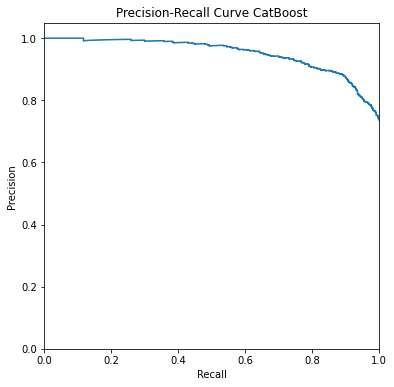

In [72]:
# Curva ROC para modelo de CatBoost

graphic_pr_curve(probabilities_test_cat, probabilities_one_test_cat, 'CatBoost')

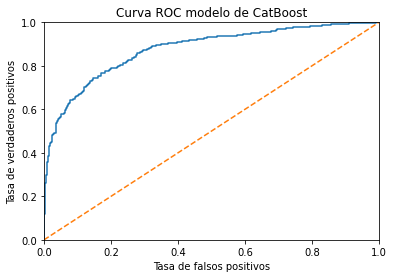

In [73]:
# Curva ROC para modelo de CatBoost

graphic_roc_curve(probabilities_one_test_cat, 'CatBoost')

In [74]:
auc_roc_cat = roc_auc_score(target_test, probabilities_one_test_cat)

print(auc_roc_cat)

0.8756249547134265


Podemos observar que se probaron 3 modelos, bosque aleatorio, regresión lógica y CatBoost, en donde podemos observar que el mejor resultado de la metrica AUC-ROC lo obtenemos con el modelo CatBoost con un valor de 0.875.

## Sobremuestreo <a id='oversampling'></a>

In [75]:
# Se realiza un sobremuestreo

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
    target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=54321)

    return features_upsampled, target_upsampled


In [76]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 3
)

new_count_class = target_upsampled.value_counts(normalize=True)
new_count_class


0.0    0.520288
1.0    0.479712
Name: target, dtype: float64

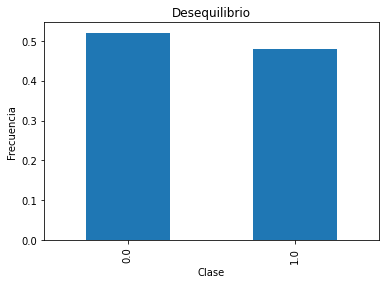

In [77]:
new_count_class.plot(kind= 'bar')
plt.title("Desequilibrio")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

Se realizó un sobremuestreo para lograr un equilibrio de datos para obtener un mejor resultado en el entrenamiento de los modelos, ahora se procede a probar los modelos para mejorarlos.

In [78]:
# Mejoramiento del modelo de bosque aleatorio con sobremuestreo

model_forest_b = RandomForestClassifier(random_state=54321, min_samples_split=5, n_estimators=400, class_weight='balanced')
model_forest_b.fit(features_upsampled, target_upsampled)

score_forest_test_b = model_forest_b.score(features_test, target_test)
predict_forest_test_b = model_forest_b.predict(features_test)

print("Accuracy del modelo :", score_forest_test_b , 'F1 para el dataset de prueba: ', f1_score(target_test, predict_forest_test_b))


Accuracy del modelo : 0.8048261178140526 F1 para el dataset de prueba:  0.8628428927680798


In [79]:
# Se realiza un ajuste de umbral para modelo de Bosque mejorado con sobremuestreo

probabilities_test_f_b = model_forest_b.predict_proba(features_test)
probabilities_one_test_f_b = probabilities_test_f_b[:, 1]


In [80]:
#precision_f_b, recall_f_b, thresholds = threshold_setting(probabilities_one_test_f_b)

Threshold = 0.00 | Precision = 0.735, Recall = 1.000
Threshold = 0.02 | Precision = 0.735, Recall = 1.000
Threshold = 0.04 | Precision = 0.739, Recall = 0.999
Threshold = 0.06 | Precision = 0.741, Recall = 0.998
Threshold = 0.08 | Precision = 0.743, Recall = 0.995
Threshold = 0.10 | Precision = 0.745, Recall = 0.995
Threshold = 0.12 | Precision = 0.751, Recall = 0.994
Threshold = 0.14 | Precision = 0.760, Recall = 0.991
Threshold = 0.16 | Precision = 0.764, Recall = 0.987
Threshold = 0.18 | Precision = 0.774, Recall = 0.986
Threshold = 0.20 | Precision = 0.780, Recall = 0.978
Threshold = 0.22 | Precision = 0.786, Recall = 0.969
Threshold = 0.24 | Precision = 0.795, Recall = 0.960
Threshold = 0.26 | Precision = 0.806, Recall = 0.957
Threshold = 0.28 | Precision = 0.811, Recall = 0.951
Threshold = 0.30 | Precision = 0.818, Recall = 0.943
Threshold = 0.32 | Precision = 0.825, Recall = 0.936
Threshold = 0.34 | Precision = 0.833, Recall = 0.928
Threshold = 0.36 | Precision = 0.844, Recall =

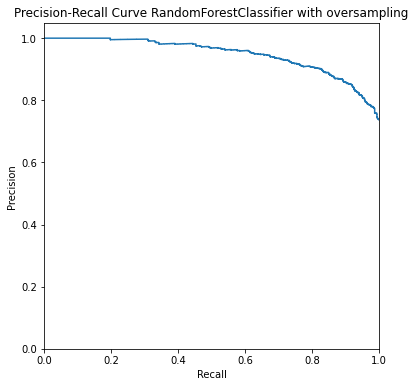

In [81]:
# Obtención de la curva PR para modelo de bosque aleatorio con sobremuestreo

graphic_pr_curve(probabilities_test_f_b, probabilities_one_test_f_b, 'RandomForestClassifier with oversampling')

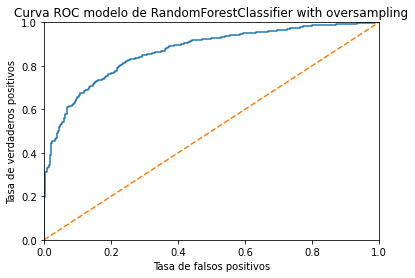

In [82]:
# Curva ROC para modelo de bosque aleatorio con sobremuestreo

graphic_roc_curve(probabilities_one_test_f_b, 'RandomForestClassifier with oversampling')

In [83]:
auc_roc_f_b = roc_auc_score(target_test, probabilities_one_test_f_b)

print(auc_roc_f_b)

0.8672456447255376


In [84]:
# Mejoramiento del modelo de regresión lógica con sobremuestreo

model_rl_b = LogisticRegression(random_state=42, solver='liblinear')
model_rl_b.fit(features_upsampled, target_upsampled)
score_train_b = model_rl_b.score(features_upsampled, target_upsampled)

score_test_b = model_rl_b.score(features_test, target_test)
predict_lrv_b = model_rl_b.predict(features_test)
f1_lrv_b = f1_score(target_test, predict_lrv_b )

print("Accuracy del modelo de regresión logística en el conjunto de entrenamiento:", score_train_b)
print("Accuracy del modelo de regresión logística en el conjunto de prueba:", score_test_b, 'f1= ', f1_lrv_b)

Accuracy del modelo de regresión logística en el conjunto de entrenamiento: 0.8888244841177835
Accuracy del modelo de regresión logística en el conjunto de prueba: 0.7544357700496807 f1=  0.8159574468085107


In [85]:
# Se realiza un ajuste de umbral para modelo de RL mejorado con sobremuestreo

probabilities_test_rl_b = model_rl_b.predict_proba(features_test)
probabilities_one_test_rl_b = probabilities_test_rl_b[:, 1]


Threshold = 0.00 | Precision = 0.735, Recall = 1.000
Threshold = 0.02 | Precision = 0.735, Recall = 1.000
Threshold = 0.04 | Precision = 0.735, Recall = 1.000
Threshold = 0.06 | Precision = 0.735, Recall = 1.000
Threshold = 0.08 | Precision = 0.738, Recall = 1.000
Threshold = 0.10 | Precision = 0.742, Recall = 0.997
Threshold = 0.12 | Precision = 0.752, Recall = 0.993
Threshold = 0.14 | Precision = 0.760, Recall = 0.988
Threshold = 0.16 | Precision = 0.777, Recall = 0.976
Threshold = 0.18 | Precision = 0.788, Recall = 0.965
Threshold = 0.20 | Precision = 0.802, Recall = 0.958
Threshold = 0.22 | Precision = 0.813, Recall = 0.942
Threshold = 0.24 | Precision = 0.827, Recall = 0.931
Threshold = 0.26 | Precision = 0.837, Recall = 0.921
Threshold = 0.28 | Precision = 0.844, Recall = 0.911
Threshold = 0.30 | Precision = 0.853, Recall = 0.897
Threshold = 0.32 | Precision = 0.862, Recall = 0.883
Threshold = 0.34 | Precision = 0.871, Recall = 0.863
Threshold = 0.36 | Precision = 0.879, Recall =

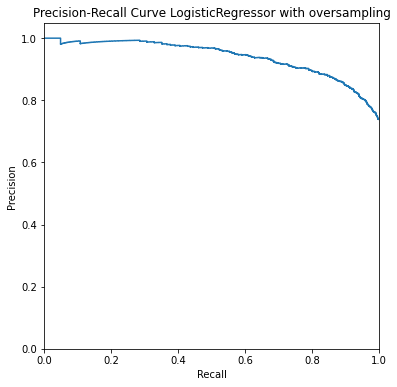

In [86]:
# Curva Pr para modelo de RL con sobremuestreo

graphic_pr_curve(probabilities_test_rl_b, probabilities_one_test_rl_b, 'LogisticRegressor with oversampling')

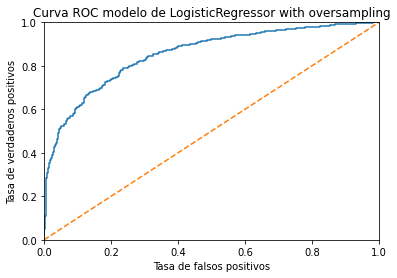

In [87]:
# Curva ROC para modelo de RL con sobremuestreo

graphic_roc_curve(probabilities_one_test_rl_b, 'LogisticRegressor with oversampling')

In [88]:
auc_roc_rl_b = roc_auc_score(target_test, probabilities_one_test_rl_b)

print(auc_roc_rl_b)

0.8537683604707734


In [89]:
# Mejoramiento del modelo de CatBoost con sobremuestreo

model_cat_b = cb.CatBoostClassifier(
        loss_function="Logloss", iterations=600, random_seed=42
    )
model_cat_b.fit(features_upsampled, target_upsampled)

score_test_cat_b = model_cat_b.score(features_test, target_test)
score_test_cat_b

Learning rate set to 0.041301
0:	learn: 0.6736185	total: 24.4ms	remaining: 14.6s
1:	learn: 0.6588003	total: 47ms	remaining: 14.1s
2:	learn: 0.6444085	total: 70ms	remaining: 13.9s
3:	learn: 0.6305433	total: 92.7ms	remaining: 13.8s
4:	learn: 0.6161904	total: 116ms	remaining: 13.8s
5:	learn: 0.6063095	total: 138ms	remaining: 13.7s
6:	learn: 0.5949491	total: 161ms	remaining: 13.6s
7:	learn: 0.5860419	total: 183ms	remaining: 13.6s
8:	learn: 0.5764842	total: 206ms	remaining: 13.5s
9:	learn: 0.5681021	total: 228ms	remaining: 13.5s
10:	learn: 0.5612311	total: 251ms	remaining: 13.4s
11:	learn: 0.5547391	total: 274ms	remaining: 13.4s
12:	learn: 0.5490240	total: 297ms	remaining: 13.4s
13:	learn: 0.5429347	total: 319ms	remaining: 13.4s
14:	learn: 0.5383150	total: 342ms	remaining: 13.3s
15:	learn: 0.5333366	total: 365ms	remaining: 13.3s
16:	learn: 0.5288876	total: 387ms	remaining: 13.3s
17:	learn: 0.5241134	total: 410ms	remaining: 13.3s
18:	learn: 0.5202834	total: 433ms	remaining: 13.2s
19:	learn: 

0.765791341376863

In [90]:
# Se realiza un ajuste de umbral para modelo de CatBoost mejorado con sobremuestreo

probabilities_test_cat_b = model_cat_b.predict_proba(features_test)
probabilities_one_test_cat_b = probabilities_test_cat_b[:, 1]


Threshold = 0.00 | Precision = 0.735, Recall = 1.000
Threshold = 0.02 | Precision = 0.735, Recall = 1.000
Threshold = 0.04 | Precision = 0.735, Recall = 1.000
Threshold = 0.06 | Precision = 0.735, Recall = 1.000
Threshold = 0.08 | Precision = 0.738, Recall = 0.999
Threshold = 0.10 | Precision = 0.753, Recall = 0.996
Threshold = 0.12 | Precision = 0.770, Recall = 0.985
Threshold = 0.14 | Precision = 0.783, Recall = 0.974
Threshold = 0.16 | Precision = 0.794, Recall = 0.962
Threshold = 0.18 | Precision = 0.803, Recall = 0.950
Threshold = 0.20 | Precision = 0.814, Recall = 0.945
Threshold = 0.22 | Precision = 0.829, Recall = 0.939
Threshold = 0.24 | Precision = 0.847, Recall = 0.928
Threshold = 0.26 | Precision = 0.853, Recall = 0.911
Threshold = 0.28 | Precision = 0.862, Recall = 0.902
Threshold = 0.30 | Precision = 0.875, Recall = 0.888
Threshold = 0.32 | Precision = 0.880, Recall = 0.879
Threshold = 0.34 | Precision = 0.889, Recall = 0.865
Threshold = 0.36 | Precision = 0.891, Recall =

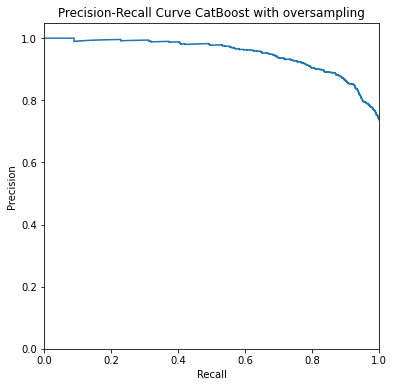

In [91]:
# Curva ROC para modelo de CatBoost con sobremuestreo

graphic_pr_curve(probabilities_test_cat_b, probabilities_one_test_cat_b, 'CatBoost with oversampling')

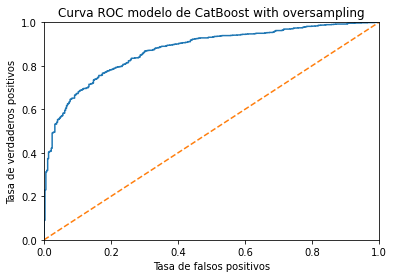

In [92]:
# Curva ROC para modelo de CatBoost con sobremuestreo

graphic_roc_curve(probabilities_one_test_cat_b, 'CatBoost with oversampling')

In [93]:
auc_roc_cat_b = roc_auc_score(target_test, probabilities_one_test_cat_b)

print(auc_roc_cat_b)

0.8732635833842267


Podemos observar que realizando un sobremuestreo para mejorar los modelos, sin embargo, podemos apreciar que las metricas son buenas pero no mejoran a los resultados sin el sobremuestro.

[Back to Contents](#back)

## Submuestreo <a id='subsampling'></a>

In [94]:
# Se realiza un submuestreo

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # < escribe el código aquí >

    features_downsampled = pd.concat(
        [features_zeros] + [features_ones.sample(frac=fraction, random_state=42)])

    target_downsampled = pd.concat(
        [target_zeros] + [target_ones.sample(frac=fraction, random_state=42)])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42
    )

    return features_downsampled, target_downsampled


In [95]:
# Se revisa el equilibrio de fases del submuestreo

features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.36
)

down_count_class = target_downsampled.value_counts(normalize=True)
down_count_class

0.0    0.501005
1.0    0.498995
Name: target, dtype: float64

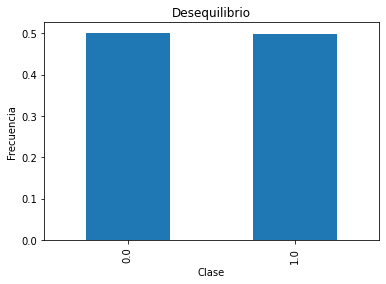

In [96]:
down_count_class.plot(kind= 'bar')
plt.title("Desequilibrio")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

Se realizó un subremuestreo para lograr un equilibrio de datos para obtener un mejor resultado en el entrenamiento de los modelos, ahora se procede a probar los modelos para mejorarlos.

In [97]:
# Mejoramiento del modelo de bosque aleatorio con submuestreo

model_forest_c = RandomForestClassifier(random_state=54321, min_samples_split=5, n_estimators=400, class_weight='balanced')
model_forest_c.fit(features_downsampled, target_downsampled)

score_forest_test_c = model_forest_c.score(features_test, target_test)
predict_forest_test_c = model_forest_c.predict(features_test)

print("Accuracy del modelo :", score_forest_test_c , 'F1 para el dataset de prueba: ', f1_score(target_test, predict_forest_test_c))


Accuracy del modelo : 0.7530163236337828 F1 para el dataset de prueba:  0.8100436681222708


In [98]:
# Se realiza un ajuste de umbral para modelo de Bosque mejorado con submuestreo

probabilities_test_f_c = model_forest_c.predict_proba(features_test)
probabilities_one_test_f_c = probabilities_test_f_c[:, 1]


Threshold = 0.00 | Precision = 0.735, Recall = 1.000
Threshold = 0.02 | Precision = 0.735, Recall = 1.000
Threshold = 0.04 | Precision = 0.739, Recall = 0.999
Threshold = 0.06 | Precision = 0.744, Recall = 0.997
Threshold = 0.08 | Precision = 0.747, Recall = 0.994
Threshold = 0.10 | Precision = 0.752, Recall = 0.990
Threshold = 0.12 | Precision = 0.759, Recall = 0.987
Threshold = 0.14 | Precision = 0.770, Recall = 0.980
Threshold = 0.16 | Precision = 0.779, Recall = 0.975
Threshold = 0.18 | Precision = 0.789, Recall = 0.968
Threshold = 0.20 | Precision = 0.801, Recall = 0.958
Threshold = 0.22 | Precision = 0.811, Recall = 0.949
Threshold = 0.24 | Precision = 0.822, Recall = 0.939
Threshold = 0.26 | Precision = 0.833, Recall = 0.930
Threshold = 0.28 | Precision = 0.840, Recall = 0.914
Threshold = 0.30 | Precision = 0.856, Recall = 0.904
Threshold = 0.32 | Precision = 0.864, Recall = 0.893
Threshold = 0.34 | Precision = 0.871, Recall = 0.883
Threshold = 0.36 | Precision = 0.885, Recall =

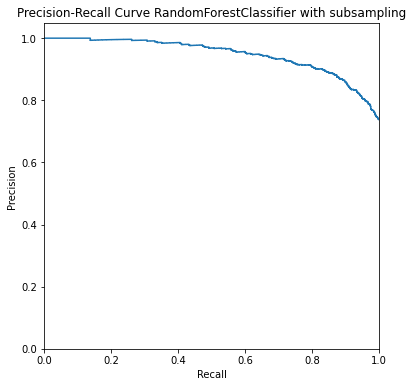

In [99]:
# Obtención de la curva PR para modelo de bosque aleatorio con submuestreo

graphic_pr_curve(probabilities_test_f_c, probabilities_one_test_f_c, 'RandomForestClassifier with subsampling')

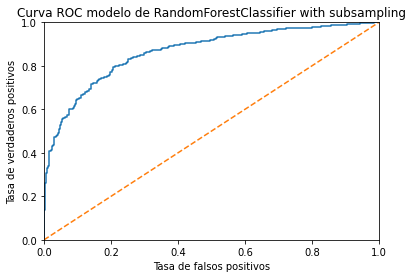

In [100]:
# Curva ROC para modelo de bosque aleatorio con submuestreo

graphic_roc_curve(probabilities_one_test_f_c, 'RandomForestClassifier with subsampling')

In [101]:
auc_roc_f_c = roc_auc_score(target_test, probabilities_one_test_f_c)

print(auc_roc_f_c)

0.8660811328371649


In [102]:
# Mejoramiento del modelo de regresión lógica con submuestreo

model_rl_c = LogisticRegression(random_state=42, solver='liblinear')
model_rl_c.fit(features_downsampled, target_downsampled)
score_train_c = model_rl_c.score(features_downsampled, target_downsampled)

score_test_c = model_rl_c.score(features_test, target_test)
predict_lrv_c = model_rl_c.predict(features_test)
f1_lrv_c = f1_score(target_test, predict_lrv_c )

print("Accuracy del modelo de regresión logística en el conjunto de entrenamiento:", score_train_c)
print("Accuracy del modelo de regresión logística en el conjunto de prueba:", score_test_c, 'f1= ', f1_lrv_c)

Accuracy del modelo de regresión logística en el conjunto de entrenamiento: 0.8402545210984594
Accuracy del modelo de regresión logística en el conjunto de prueba: 0.7366926898509581 f1=  0.7960417811984607


In [103]:
# Se realiza un ajuste de umbral para modelo de RL mejorado con submuestreo

probabilities_test_rl_c = model_rl_c.predict_proba(features_test)
probabilities_one_test_rl_c = probabilities_test_rl_c[:, 1]


Threshold = 0.00 | Precision = 0.735, Recall = 1.000
Threshold = 0.02 | Precision = 0.735, Recall = 1.000
Threshold = 0.04 | Precision = 0.735, Recall = 1.000
Threshold = 0.06 | Precision = 0.735, Recall = 1.000
Threshold = 0.08 | Precision = 0.736, Recall = 0.999
Threshold = 0.10 | Precision = 0.745, Recall = 0.998
Threshold = 0.12 | Precision = 0.753, Recall = 0.993
Threshold = 0.14 | Precision = 0.769, Recall = 0.981
Threshold = 0.16 | Precision = 0.783, Recall = 0.967
Threshold = 0.18 | Precision = 0.796, Recall = 0.954
Threshold = 0.20 | Precision = 0.815, Recall = 0.941
Threshold = 0.22 | Precision = 0.829, Recall = 0.930
Threshold = 0.24 | Precision = 0.835, Recall = 0.911
Threshold = 0.26 | Precision = 0.846, Recall = 0.901
Threshold = 0.28 | Precision = 0.859, Recall = 0.883
Threshold = 0.30 | Precision = 0.869, Recall = 0.864
Threshold = 0.32 | Precision = 0.876, Recall = 0.849
Threshold = 0.34 | Precision = 0.880, Recall = 0.833
Threshold = 0.36 | Precision = 0.890, Recall =

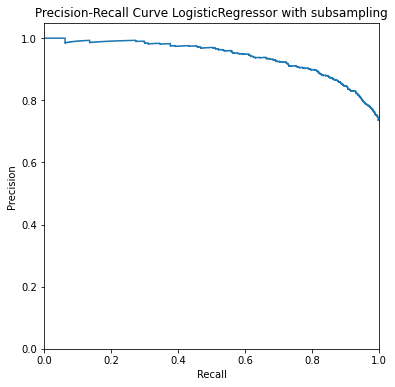

In [104]:
# Curva Pr para modelo de RL con submuestreo

graphic_pr_curve(probabilities_test_rl_c, probabilities_one_test_rl_c, 'LogisticRegressor with subsampling')

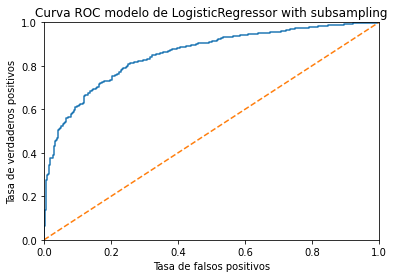

In [105]:
# Curva ROC para modelo de RL con submuestreo

graphic_roc_curve(probabilities_one_test_rl_c, 'LogisticRegressor with subsampling')

In [106]:
auc_roc_rl_c = roc_auc_score(target_test, probabilities_one_test_rl_c)

print(auc_roc_rl_c)

0.8535147556595277


In [107]:
# Se realiza un ajuste de umbral para modelo de CatBoost con submuestreo

model_cat_c = cb.CatBoostClassifier(
        loss_function="Logloss", iterations=600, random_seed=42
    )
model_cat_c.fit(features_downsampled, target_downsampled)

score_test_cat_c = model_cat_c.score(features_test, target_test)
score_test_cat_c

Learning rate set to 0.026256
0:	learn: 0.6835913	total: 12.5ms	remaining: 7.5s
1:	learn: 0.6722985	total: 24.7ms	remaining: 7.39s
2:	learn: 0.6629527	total: 36.8ms	remaining: 7.31s
3:	learn: 0.6542995	total: 48.7ms	remaining: 7.26s
4:	learn: 0.6450327	total: 60.7ms	remaining: 7.23s
5:	learn: 0.6366983	total: 72.7ms	remaining: 7.2s
6:	learn: 0.6296189	total: 84.7ms	remaining: 7.17s
7:	learn: 0.6237274	total: 96.7ms	remaining: 7.15s
8:	learn: 0.6167968	total: 109ms	remaining: 7.14s
9:	learn: 0.6104125	total: 121ms	remaining: 7.13s
10:	learn: 0.6038007	total: 133ms	remaining: 7.11s
11:	learn: 0.5986675	total: 149ms	remaining: 7.28s
12:	learn: 0.5932639	total: 160ms	remaining: 7.24s
13:	learn: 0.5867411	total: 173ms	remaining: 7.22s
14:	learn: 0.5823276	total: 185ms	remaining: 7.22s
15:	learn: 0.5779002	total: 198ms	remaining: 7.21s
16:	learn: 0.5726500	total: 209ms	remaining: 7.18s
17:	learn: 0.5681892	total: 221ms	remaining: 7.15s
18:	learn: 0.5647804	total: 233ms	remaining: 7.14s
19:	l

0.752306600425834

In [108]:
probabilities_test_cat_c = model_cat_c.predict_proba(features_test)
probabilities_one_test_cat_c = probabilities_test_cat_c[:, 1]


Threshold = 0.00 | Precision = 0.735, Recall = 1.000
Threshold = 0.02 | Precision = 0.735, Recall = 1.000
Threshold = 0.04 | Precision = 0.735, Recall = 1.000
Threshold = 0.06 | Precision = 0.735, Recall = 1.000
Threshold = 0.08 | Precision = 0.736, Recall = 1.000
Threshold = 0.10 | Precision = 0.749, Recall = 0.999
Threshold = 0.12 | Precision = 0.762, Recall = 0.986
Threshold = 0.14 | Precision = 0.774, Recall = 0.981
Threshold = 0.16 | Precision = 0.788, Recall = 0.977
Threshold = 0.18 | Precision = 0.796, Recall = 0.962
Threshold = 0.20 | Precision = 0.802, Recall = 0.953
Threshold = 0.22 | Precision = 0.816, Recall = 0.943
Threshold = 0.24 | Precision = 0.834, Recall = 0.934
Threshold = 0.26 | Precision = 0.843, Recall = 0.924
Threshold = 0.28 | Precision = 0.859, Recall = 0.907
Threshold = 0.30 | Precision = 0.869, Recall = 0.893
Threshold = 0.32 | Precision = 0.879, Recall = 0.877
Threshold = 0.34 | Precision = 0.883, Recall = 0.863
Threshold = 0.36 | Precision = 0.888, Recall =

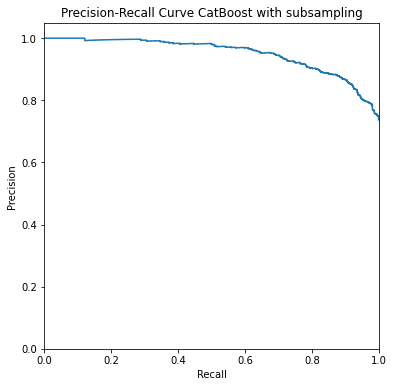

In [109]:
# Curva ROC para modelo de CatBoost con submuestreo

graphic_pr_curve(probabilities_test_cat_c, probabilities_one_test_cat_c, 'CatBoost with subsampling')

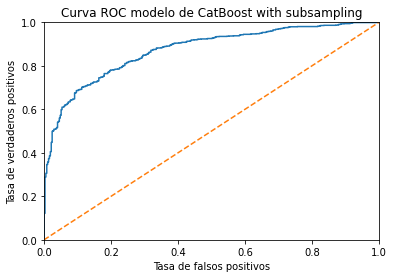

In [110]:
# Curva ROC para modelo de CatBoost con submuestreo

graphic_roc_curve(probabilities_one_test_cat_c, 'CatBoost with subsampling')

In [111]:
auc_roc_cat_c = roc_auc_score(target_test, probabilities_one_test_cat_c)

print(auc_roc_cat_c)

0.8726606250064695


en este caso se realizó un submuestreo de los datos, buscando una mejora en el rentrenamiento de los datos, sin embargo, podemos observar que se los resultados no superan a los obtenidos con el submuestreo.

## Resultados <a id='results'></a>

In [112]:

columns_results = ['model', 'accuracy', 'auc_roc']

results_values = [
    ['Random Forest Classifier', best_accuracy_forest , auc_roc_f],
    ['Random Forest Classifier with oversampling', score_forest_test_b , auc_roc_f_b],
    ['Random Forest Classifier with subsampling', score_forest_test_c , auc_roc_f_c],
    ['Logistic Regression', score_test_lr , auc_roc_rl ],
    ['Logistic Regression with oversampling', score_test_b , auc_roc_rl_b ],
    ['Logistic Regression with subsampling', score_test_lr , auc_roc_rl ],
    ['CatBoost', best_score_cat_a , auc_roc_cat ],
    ['CatBoost with oversampling', score_test_c , auc_roc_rl_c ],
    ['CatBoost with subsampling', score_test_cat_c , auc_roc_cat_c ]
]


results = pd.DataFrame(data= results_values, columns = columns_results)

results

,model,accuracy,auc_roc
0,Random Forest Classifier,0.804116,0.868327
1,Random Forest Classifier with oversampling,0.804826,0.867246
2,Random Forest Classifier with subsampling,0.753016,0.866081
3,Logistic Regression,0.806955,0.852330
4,Logistic Regression with oversampling,0.754436,0.853768
5,Logistic Regression with subsampling,0.806955,0.852330
6,CatBoost,0.823279,0.875625
7,CatBoost with oversampling,0.736693,0.853515
8,CatBoost with subsampling,0.752307,0.872661


In [113]:
results_1= results.set_index('model')
results_1

,accuracy,auc_roc
model,,
Random Forest Classifier,0.804116,0.868327
Random Forest Classifier with oversampling,0.804826,0.867246
Random Forest Classifier with subsampling,0.753016,0.866081
Logistic Regression,0.806955,0.852330
Logistic Regression with oversampling,0.754436,0.853768
Logistic Regression with subsampling,0.806955,0.852330
CatBoost,0.823279,0.875625
CatBoost with oversampling,0.736693,0.853515
CatBoost with subsampling,0.752307,0.872661


In [114]:
results_1= results_1.sort_values(by='auc_roc', ascending = False)

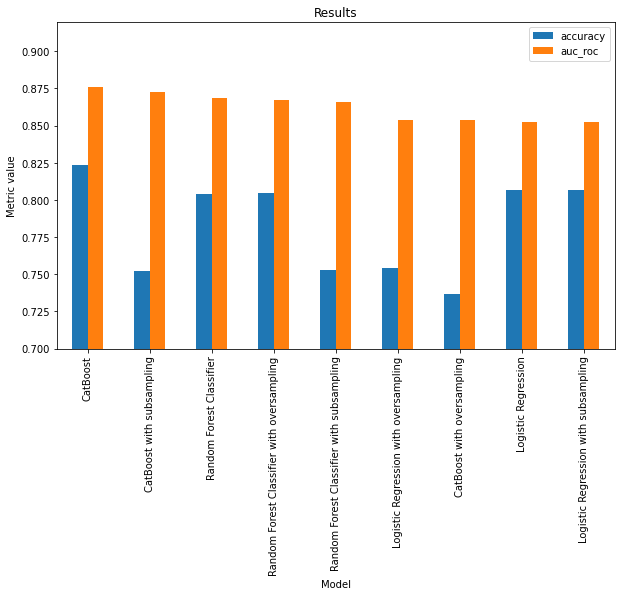

In [115]:
results_1.plot(kind='bar', title = 'Results', figsize=(10,6))
plt.ylim(0.7)
plt.xlabel("Model")
plt.ylabel("Metric value")
plt.show()

En esta gráfica podemos observar que modelo obtuvo mejores métricas, aquí podemos apreciar que el modelo que obtiene el mejor resultado en AUC_ROC con 0.875.

[Back to Contents](#back)

## Conclusiones <a id='end'></a>

Incialmente se revisaron los archivos que se nos proporcionaron, se revisaron primero uno por uno para revisar datos ausente, duplicados y se corrigieron algunos tipos de datos, detectando que el tamaño de los archivos es diferentes y la gran mayoría son datos categóricos. Se sabe que la columna Target tenía datos de fechas y de str 'No', por lo que se propuso generar una nueva columna Target, donde se puediera pareciar si el contrato está activo ('No') o ya fue cancelado (tiene fecha de cancelación).

Posteriormente se unificaron los archivos en uno solo, pero al tener los archivos diferentes tamaños se generan datos ausentes en columnas categóricas, los cuales se rellenan con una nueva categoría y después de esto se revisa nuevamente si hay datos ausentes y duplicados. Una vez realizado este preproceso se comienza a codificar los datos con OHE. Posteriormente se realizó un análisis de equilibrio de clases, en donde se observó claramente que había un desequilibrio en el Target.

Se probaron cuatro modelos de predicción, bosque aleatorio, regresión lógica, CatBoost y red neuronal, en donde en todos se obtuvo una métrica exactitud superior a 0.6 en los conjuntos de prueba, mientras que para la mátrica AUC_ROC se logró resultados superiores a 0.8, con excepción de la red neuronal donde se obtuvo un valor de AUC_ROC de 0.5, siendo el modelo que obtiene mejores resultados de las métricas tanto de exactitud como AUC_ROC es el modelo de CatBoost, donde obtiene una exactitud de 0.82 y un AUC_ROC de 8.75, cumpliendo con el objetivo del proyecto.

Se realizaron pruebas de de sobre muestreo y submuestreo para equilibrar los datos del Target con los tres mejores modelos, bosques aleatorios, regresión lógica y CatBoost, en donde el mejor modelo con las mejores métricas fue nuevamente CatBoost, sin embargo, niguno de estos ajustes supero las métricas del entenamiento de los datos sin submuestreo o sobremuestreo.

Por lo tanto, el mejor modelo para poder realizar el análisis para predecir la posibilidad de cancelación de contratos es el modelo de Catboost.  

[Back to Contents](#back)

# INFORME DE SOLUCION


## RESUMEN

Se realizó el preprocesamiento de datos para adecuarlos para su análisis, se entrenaron diferentes modelos de prediccones y determinando los mejores hiperpaámetros, para poder pronosticar que usuarios planean cancelar su contrato, monitoreando la calidad de los modelos mediante las métricas precisión y auc_roc, obteneiendo los mejores resultados con CatBoost.

## OBJETIVO

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

## PREGUNTAS

<li><strong>¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?</strong><br>
        <i>Respuesta:</i> Para la generación del código de solución, se realizó todos loas pasos que se indicaron el el plan de trabajo. Al contrario se implementaron nuevos pasos para poder complementar y optimizar el código para obtener mejores métricas, por ejemplo, agregar un  nuevo paso, donde se reflejan todos los resultados para hacer una comparación y poder apreciar cuales son los mejores resultados.
    </li>

<li><strong>¿Qué dificultades encontraste y cómo lograste resolverlas?</strong><br>
        <i>Respuesta:</i> En lo personal no fue el proyecto con mayor dificultad, lo único complicado fue aplicar el modelo de redes neuronales, el cual con el material que nos proporcionaron en el strig, foros de internet y apoyo de los tutores de TripleTen, se logró resolver los errores que se generaban. Otra dificultad  a la que me enfrenté fue que yo trabajé con los archivos que descargue para el proyecto, el cual probé antes de su revisión, pero cuando el revisor lo evaluó, había algunos errores con respecto al archivo internet, ya que en la plataforma con el nombre del archivo cargaba datos del proyecto del sprint 4, motivo por el que obviamente no se encontraba la información necesaria para resolver el proyecto y con ayuda de mi tutor encontramos la ruta correcta para cargar los datos.
    </li>

<li><strong>¿Cuáles fueron algunos de los pasos clave para resolver la tarea?</strong><br>
        <i>Respuesta:</i> Considero que los pasos claves son el preprocesamiento y realizar los EDA correctamente, ya que con esto obtenemos un DataFrame limpio para que podamos entrenar los modelos y poder obtener mejoras métricas y cumplir el objetivo, ya que si tenemos datos ausentes o no tenemos información necesario o adecuada no podremos entrenar adecuadamente nuestro proyecto.
    </li>

<li><strong>¿Cuál es tu modelo final y qué nivel de calidad tiene?</strong><br>
        <i>Respuesta:</i>   el mejor modelo fue el CatBoos con un auc_roc = 0.875
    </li>


## INFORME DE RESULTADOS

Después de todo el análisis de datos y uso de diferentes modelos de entrenamiento, en donde se buscaron los mejores hiperpaámetros, el modelo con mejores métricas de auc_roc fue el de CatBoost, el cual cumple con el objetivo de un auc_roc mayor a 0.85

Inicialmente se cargaro y revisaron los datos para evitrar datos ausentes, duplicados y corrigiendo formatos de nombres de columnas y tipos de datos,  posteriomente se unificaron un solo DataFrame, el cual contenía datos ausentes ya que los 4 archivos tenían tamaños diferentes de filas, motivo por el que se agregaron nuevas cateorías. posteriomente se codificó los datos con ONE-HOT para poder considerar la mayor cantidad de información posible. re volvierona  revisar para evitar datos duplicados o ausentes, al igual se buscaron outliers. Se detectó un error en la plataforma, donde al cargar los datos carga datos de otro proyecto, generando errores y si no se tiene conocimiento trabajando solamente en la plataforma estaríamos entenando los modelos con información erronea y obteniendo predicciones que no nos servirían, por lo que es necesario poner la ruta detallada para que el sistema encuentre los datos correctos, por lo que se solicitó apoyo a los tutores y porporcionaron ruta exacta y se solucionó el incidente. 

Una vez revisados los datos y observando que tenemos datos limpios se comenzó a entrenar varios tipos de modelos, entre ellos bosque aleatorio y regresión lógica, sin embargo, en este caso, se agregaron más modelos de los que  se indicaron en el plan de trabajo, siendo estos red neuronal y CatBoost, debido a que si bien, no se obtuvieron malos resultados enlas predicciones, se buscó optimizar y obtener mejores resultados, para esto se trabajó probando diferentes hiperparámetros.

Los análisis con lo smodelos se iniciaron con datos que presentaban desequilibrio en las clases del taget, con la intensión de observar el comportamiento de las predicciones, en donde el mejor resultado que se obtuvo fue con el modelo CatBoost con un ROC_AUC  de 0.875. Buscando mejorar los modelos y sus resultados se aplicó un sobre muestreo y submuestreo, buscando un un equilibrio de fases del target y obtener mejores métricas, sin embargo, los resultados obtenidos eran buenos pero no mejor que cuando tenemos un desequilibrio. 

Un apartado adicional que se agregó al plan de trabajo fue en donde damos a conocer los resultados en una tabla para poder obserbar los resultados de las métricas obtenidas de los modelos, se graficaron para poder tener una mejor apreciación visual de estos.

Se cumplió con la estructura del poan de trabajo, sin embargo, hubo algunas adiciones a este buscando mejoras en los resultados y representar meor estos.

Siendo el modelo con mejores métricas de ROC_AUC el de CatBost con desequilibrio en fases del target  de auc_roc=0.875 con hiperparámetros loss_function="Logloss", iterations=800, random_seed=42. Por lo tanto, el modelo que nos prorciona mejores resultados es el CatBoost para predecir la tasa de cancelaciones de contratos.